In [121]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [122]:
#Load diabetes data for later. 
df = pd.read_csv("diabetes.csv")
df = df[df["BMI"]>10]
df = df[df["BloodPressure"]>10]
dfD = df[df["Outcome"]==1]
dfN = df[df["Outcome"]==0]
dPos = dfD.BMI
dNeg = dfN.BMI

<h1>Power - how much can we trust our tests?</h1>

The varainaces are very close, which means that the standard t-test is valid. The difference in the means is what we will tests - is that difference likely to be real, or due to chance?

<h1>Errors and Power</h1>
Our hypothesis tests are effectively doing a classification - should we trust this effect as significant, or is it likely to be due to chance. In doing this, we introduce errors, two different types:
<ul>
<li>False Positive - The effect is really due to chance, and we've considered it as significant. (Type 1, alpha)
<li>False Negative - The effect is significant, and we've considered it a due to chance. (Type 2, beta)
</ul>
The false positive rate is pretty simple - the threshold rate (commonly .05). We are defining a cutoff at the threshold value - a 1 in 20 criteria means that we expect 1 out of 20 tests to be incorrect - false positive. See book pg 130 for details on how we could show this with CDFs. 
<br><br>
Detecting false negatives isn't as easy...  

<h3>Power</h3>
Power is how the likelihood of a false negative is expressed, in terms of the compliment. The power is the rate of correctly identified negatives, or (1 - False Negatives). We can calculate this with a function from statsmodels, we can also try to generate it (pg131).

First, we'll use the library function. (We also need the effect size - that's what the function will use to estimate how many )

<h2>Load some new data</h2>

We are going to attempt to look at the difference in means between male and female age in the sample data below. 

In [125]:
#Load data, do a little filtering
df2 = pd.read_csv("oasis_cross-sectional.csv")
df2.drop(columns={"ID", "Hand", "Delay"}, inplace=True)
df2 = df2[df2["CDR"]<2]
df2 = df2[df2["Age"]>60]
males = df2[df2["M/F"]=="M"]
females = df2[df2["M/F"]=="F"]
mAge = males["Age"]
fAge = females["Age"]
df2.head()

M/F  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0    F   74   2.0  3.0  29.0  0.0  1344  0.743  1.306
2    F   73   4.0  3.0  27.0  0.5  1454  0.708  1.207
8    M   74   5.0  2.0  30.0  0.0  1636  0.689  1.073
11   F   81   5.0  2.0  30.0  0.0  1664  0.679  1.055
13   M   76   2.0  NaN  28.0  0.5  1738  0.719  1.010

In [126]:
#Get Statistics
mMean, fMean, mCount, fCount = mAge.mean(), fAge.mean(), mAge.count(), fAge.count()
mMean, fMean, mCount, fCount

(75.92424242424242, 76.7265625, 66, 128)

There's a difference in means of apx 1 year. Is this significant?

In [127]:
#Scipy ttest:
stat, pval = ss.ttest_ind(mAge, fAge)
pval

0.5077810125785922

It appears that this difference is likely due to chance, the p value is high. How powerful is our test?

In [128]:
#Statsmodels calculation of power. 
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(fAge, mAge)
alpha = .05
nobs = mCount + fCount

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces


(0.28602587493138343, 0.10056623784128305)

What did we get? Our power is small, this is an indication that we are making a lot of potential mistakes here.

This helps indicate that our asserion of an effect here is likely due to chance. 

In general, powers of over 80% are considered "good", as a rule of thumb. 

If you're working through the book examples, think about how this relates. The book is building a loop to, by hand, count up the number of false negatives. They then to 1-that to get the power - same, same, but a different approach. 

One more.... The old BMI one from last time...

In [124]:
#Get some basic stats for the diabetes data


35.35099601593622 6.577284318317407 43.26066900398408 251
30.95711297071125 6.558552726769107 43.01461386981049 478


In [129]:
#ttest for the BMI in diabetics/nondiabetics
sstat, pval = ss.ttest_ind(dPos, dNeg, alternative="greater")
pval

2.717898126321664e-17

P value is really, really small. The effect is likely not due to random chance. What is the power of this one?

In [130]:
#Statsmodels calculation of power. 


(1.0, 0.6692882815710599)

Huge power. That makes sense, our effect size is substantial and the p-value is extremely low. 1.0 is a bit of a stretch as an assertion, due to randomness - this result would likely be more accurately reported as 'near 1' or >.99 or something like that. Our trial could have a false negative, it is just unlikely. Our run happened to just not have any. 

<h2>Chi-2 Tests</h2>

We can also mix up the tests a little bit to look at things a little differently. One example is dealing with categorical data and proportions - the chi squared test. Chi2 calculates relationships between categorical varaibles by looking at the difference between an expected number of observations, and the real number of observations. The other stuff in here generally looks at differences in the means of numerical values, chi2 looks at counts of categorical. 

In the book 9.7 there's an example of using chi2 to perform a huypothesis test on a proportion. 

Later on in machine learning stuff, this chi2 concept is used to try to determine which categorical features are useful in a model, similarly to how correlation is used with numerical varaibles. 

The heart of chi2 is calculating how big of a differnce there is between the counts that we'd expect, and the counts that we observe. For this example here we have a die that we've rolled 60 time, if the dice is fair, the expected results would be even - 10 rolls per number. This is represented by the expected list below. If we count up the actual rolls, we observe a difference in counts, this is shown in the observed list. We want to know if this is reasonably likely to be due to random chance, or if this is likely a real effect (i.e. a rigged die). The chi2 gives us a p-value and all the same logic applies with testing that p. 

In [131]:
#Scipy chi2
expected = [10,10,10,10,10,10]
observed = [8,9,19,5,8,11]
ss.chisquare(observed, expected)

Power_divergenceResult(statistic=11.6, pvalue=0.040699388504049985)

P value is just below the cutoff of .05. We may well be getting scammed...

In [132]:
#Slightly more fair example
#if the expectations are even, we can leave out the expectations, they'll be assumed
observed2 = [9,11,12,9,9,10]
ss.chisquare(observed2)

Power_divergenceResult(statistic=0.8, pvalue=0.9770333437569263)

We see that the p-value is high, a difference this small is almost certainly due to chance. 
<br><br><br>
One a little more involved...

You're in charge of security at a casino. You are watching a blackjack dealer who you think may be corrupt. You notice that for certain players, they appear to be getting winning cards more often than you'd expect. Specifically, those players look like they are getting Aces, and 10 value cards (K,Q,J,10) pretty frequently, and this is resulting in those players winning quite a bit of money. You observe 780 hands and count the number of high value cards they players receive from the dealer. Your counts are as follows:
<ul>
<li>Observed 74 Aces, 250 "10 cards", 456 cards 9 and below. 
<li>Expectation - there are 52 cards in each deck, 4 of each value (A, K, Q, J, 10, etc...). The game is played with many decks and they are reshuffled partway though, so you can approximate the odds of any given value being drawn as 1/13. 
</ul>
Is this game biased?

In [133]:
#350 total draws
#Aces, 10 cards, others

Power_divergenceResult(statistic=4.883333333333333, pvalue=0.08701570436572376)

<h2>What if there are 3 or more groups? </h2>

We can use ANOVA - analysis of varaince. Anova is short for analysis of variance, and can kind of be thought of as a 3+ way ttest. Again, we are going to look if there appears to be a significant difference in the means of any of the groups. We form our hypothesis as follows:
<ul>
<li>Null Hypothesis - all the groups have the same mean.
<li>Alternative Hyp. - at least one of the groups has a different mean
</ul>
Note - this will only give us if one is different from the others, it would generate a list of all the differences or anything that fancy. 

ANOVA has a few assumptions:
<ul>
<li>The data is independent - observations are only in one group.
<li>The data is normal.
<li>Variances are close to equal.
</ul>

We can try to test this with the current data, we'll look for if there's a substantial differences in the Age between groups with different levels of education. 

ANOVA type of analysis can be well illustrated using a chart called a boxplot. Remember - the goal of these tests is to look for differences in the means of different samples, we can eyball that pretty well with one of these charts.

<AxesSubplot:xlabel='Educ', ylabel='Age'>

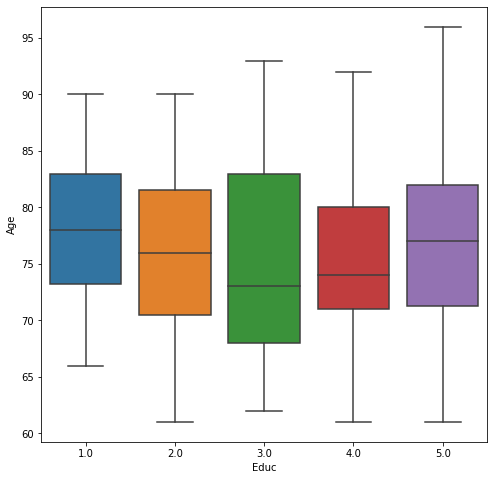

In [134]:
#Make a boxplot to demonstrate. 
sns.boxplot(data=df2, x="Educ", y="Age")

We need to check the varaiances to be sure that this is going to work OK. 

In [135]:
#First, test for vars being equal-ish
varStat, varP = ss.levene(df2['Age'][df2['Educ'] == 1],
               df2['Age'][df2['Educ'] == 2],
               df2['Age'][df2['Educ'] == 3],
               df2['Age'][df2['Educ'] == 4],
               df2['Age'][df2['Educ'] == 5])
varP

0.7071382063804008

The "are the variances equal" question that we calculate with the levene test above is another hypothesis test. It returns a p-value that we can use to reject/accept the NH. In this case, p is high, so we can't reject the NH, and the varaiances are likely pretty similar. Yay! 

The formula name is because ANOVA uses what's called an f-statistic to do its analysis. F is a ratio of two varainaces, so that's where the ANOVA name comes from. It is analyzing the variation within each sample to the variation between samples. We get back that f statistic and the p value. 

<b> F = var between samples / var within samples </b>

In [136]:
#
ss.f_oneway(df2['Age'][df2['Educ'] == 1],
               df2['Age'][df2['Educ'] == 2],
               df2['Age'][df2['Educ'] == 3],
               df2['Age'][df2['Educ'] == 4],
               df2['Age'][df2['Educ'] == 5])

F_onewayResult(statistic=0.9489002702553063, pvalue=0.43691320162590475)

P value is high, we can't reject the NH, so the means between the groups appears to be equal. Looking at F, that makes sense, if we found that the samples varried from each other, that ratio would be way higher. This relationship generally holds true. 

<h3>Challenge - try to use any other data we have used that has 3+ categories. Slice the data and do an ANOVA on it to see if the means vary.</h3>

In [137]:
#ANOVA

<h1>For next time...</h1>

<h2>What if the data isn't normal?</h2>
The above tests have an assumption that the data is normal. What if it isn't?

For non-normal data we need a different type of test, such as Mann-Whitney. 